# HR Data Analysis

This notebook provides a comprehensive analysis of the HR database, including:
- Statistical analysis
- Data distributions
- Trends and patterns
- Relationships between different data points

## Table of Contents:
1. Data Loading and Setup
2. People Analysis
3. Assignments Analysis
4. Geographic Analysis (Addresses)
5. Cross-Table Analysis

# HR Data Analysis

This notebook provides a comprehensive analysis of the HR database, including:
- Statistical analysis
- Data distributions
- Trends and patterns
- Relationships between different data points

## Table of Contents:
1. Data Loading and Setup
2. People Analysis
3. Assignments Analysis
4. Geographic Analysis (Addresses)
5. Cross-Table Analysis

# HR Data Analysis

This notebook provides a comprehensive analysis of the HR database, including:
- Statistical analysis
- Data distributions
- Trends and patterns
- Relationships between different data points

## Table of Contents:
1. Data Loading and Setup
2. People Analysis
3. Assignments Analysis
4. Geographic Analysis (Addresses)
5. Cross-Table Analysis

# HR Data Analysis

This notebook provides a comprehensive analysis of the HR database, including:
- Statistical analysis
- Data distributions
- Trends and patterns
- Relationships between different data points

## Table of Contents:
1. Data Loading and Setup
2. People Analysis
3. Assignments Analysis
4. Geographic Analysis (Addresses)
5. Cross-Table Analysis

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Set up plotting styles
plt.style.use('default')
sns.set_theme(style='whitegrid')

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [2]:
def load_data():
    """Load data from SQLite database into pandas DataFrames."""
    conn = sqlite3.connect('hr_database.sqlite')
    
    # Load tables
    people_df = pd.read_sql_query("SELECT * FROM per", conn)
    assignments_df = pd.read_sql_query("SELECT * FROM assignments", conn)
    addresses_df = pd.read_sql_query("SELECT * FROM addresses", conn)
    
    conn.close()
    return people_df, assignments_df, addresses_df

# Load the data
people_df, assignments_df, addresses_df = load_data()

print("Data loaded successfully!")
print(f"Number of records:")
print(f"People: {len(people_df)}")
print(f"Assignments: {len(assignments_df)}")
print(f"Addresses: {len(addresses_df)}")

Data loaded successfully!
Number of records:
People: 1000
Assignments: 1000
Addresses: 1000


## 1. People Analysis

Let's analyze the demographics and characteristics of our workforce.


=== People Data Analysis ===

Basic Statistics:
            per_id          age
count  1000.000000  1000.000000
mean    500.500000    54.896000
std     288.819436    33.477783
min       1.000000     0.000000
25%     250.750000    26.000000
50%     500.500000    53.000000
75%     750.250000    83.000000
max    1000.000000   115.000000


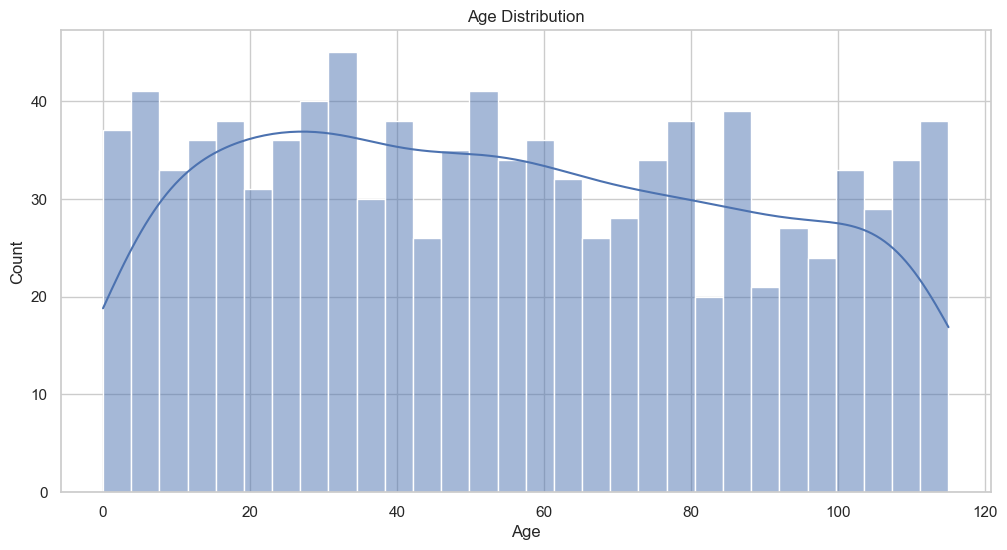


Age Statistics:
count    1000.000000
mean       54.896000
std        33.477783
min         0.000000
25%        26.000000
50%        53.000000
75%        83.000000
max       115.000000
Name: age, dtype: float64


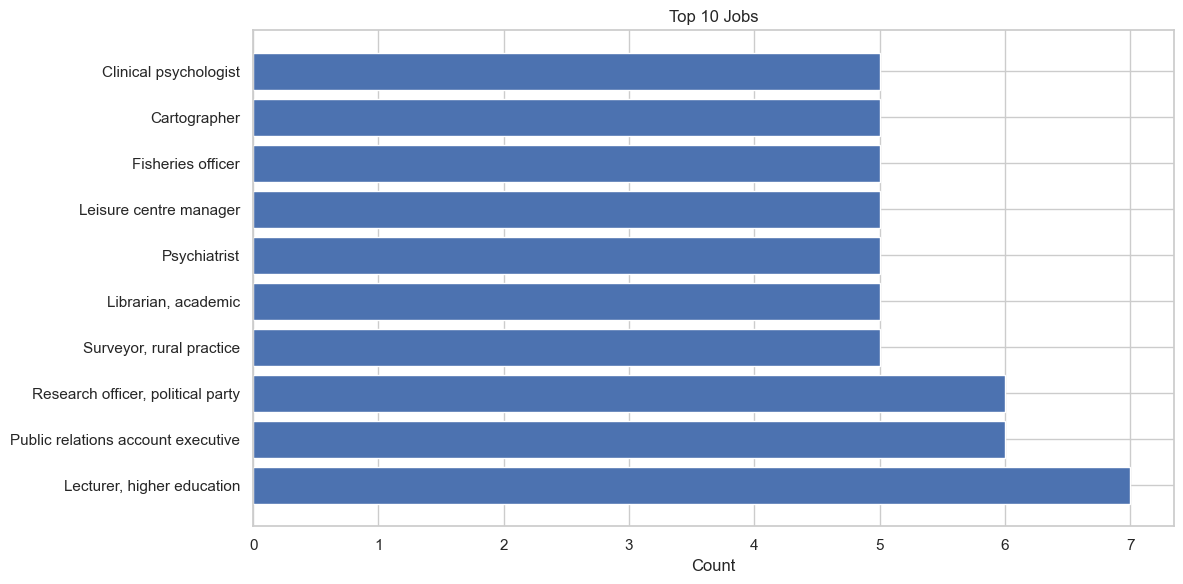


Top 5 Companies:
company
Young and Sons    3
Martinez Inc      2
Davis Ltd         2
Dawson Group      2
Barnes Inc        2
Name: count, dtype: int64


In [3]:
def analyze_people(df):
    """Comprehensive analysis of people data."""
    print("\n=== People Data Analysis ===")
    
    # Basic statistics
    print("\nBasic Statistics:")
    print(df.describe())
    
    # Age distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='age', bins=30, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
    
    # Age statistics
    print("\nAge Statistics:")
    print(df['age'].describe())
    
    # Top 10 jobs
    plt.figure(figsize=(12, 6))
    job_counts = df['job'].value_counts().head(10)
    plt.barh(job_counts.index, job_counts.values)
    plt.title('Top 10 Jobs')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Top companies
    print("\nTop 5 Companies:")
    print(df['company'].value_counts().head())
    
    # Interactive job distribution
    job_dist = df['job'].value_counts().reset_index()
    job_dist.columns = ['Job', 'Count']
    fig = px.treemap(job_dist, path=['Job'], values='Count',
                     title='Job Distribution (Interactive)')
    fig.show()

analyze_people(people_df)

## 2. Assignments Analysis

Analyzing job assignments and company distributions.


=== Assignments Analysis ===


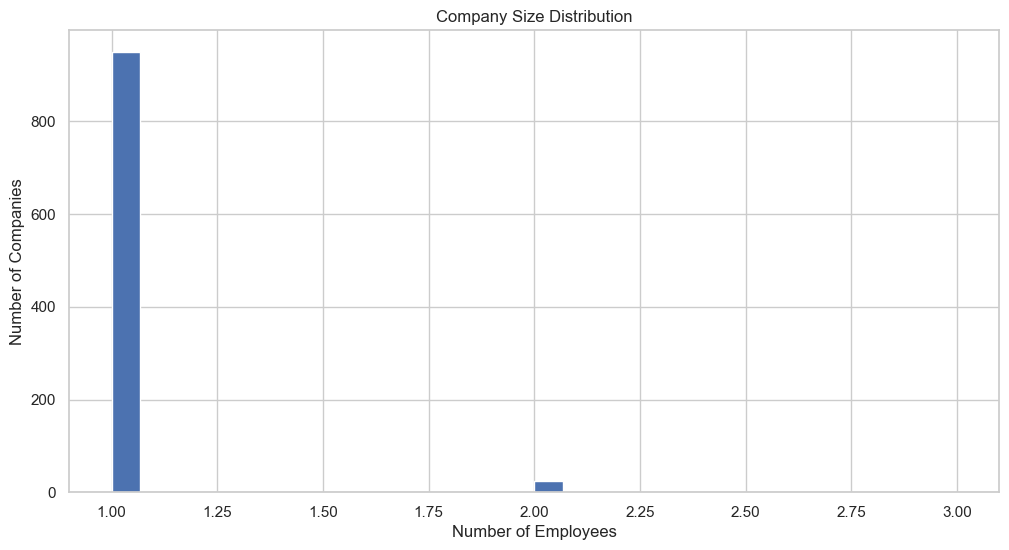

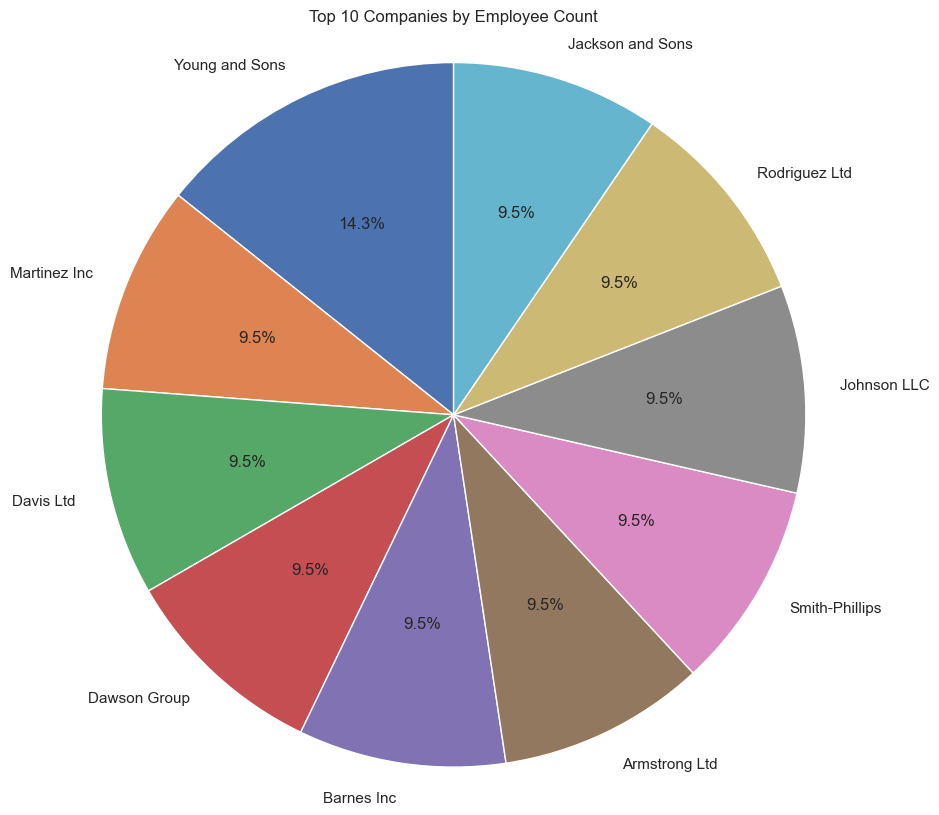

In [4]:
def analyze_assignments(df):
    """Comprehensive analysis of assignments data."""
    print("\n=== Assignments Analysis ===")
    
    # Convert date_joined to datetime if not already
    if 'date_joined' in df.columns:
        df['date_joined'] = pd.to_datetime(df['date_joined'])
        
        # Joining dates distribution
        plt.figure(figsize=(12, 6))
        df['date_joined'].dt.year.value_counts().sort_index().plot(kind='bar')
        plt.title('Distribution of Joining Years')
        plt.xlabel('Year')
        plt.ylabel('Number of Employees')
        plt.xticks(rotation=45)
        plt.show()
        
        # Monthly joining trends
        monthly_joins = df['date_joined'].dt.month.value_counts().sort_index()
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_joins.index, monthly_joins.values, marker='o')
        plt.title('Monthly Joining Trends')
        plt.xlabel('Month')
        plt.ylabel('Number of Joins')
        plt.grid(True)
        plt.show()
    
    # Company analysis
    company_counts = df['company'].value_counts()
    
    # Company size distribution
    plt.figure(figsize=(12, 6))
    plt.hist(company_counts.values, bins=30)
    plt.title('Company Size Distribution')
    plt.xlabel('Number of Employees')
    plt.ylabel('Number of Companies')
    plt.show()
    
    # Top companies pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(company_counts.head(10), labels=company_counts.head(10).index,
            autopct='%1.1f%%', startangle=90)
    plt.title('Top 10 Companies by Employee Count')
    plt.axis('equal')
    plt.show()

analyze_assignments(assignments_df)

## 3. Geographic Analysis

Analyzing the geographic distribution of employees.


=== Geographic Analysis ===


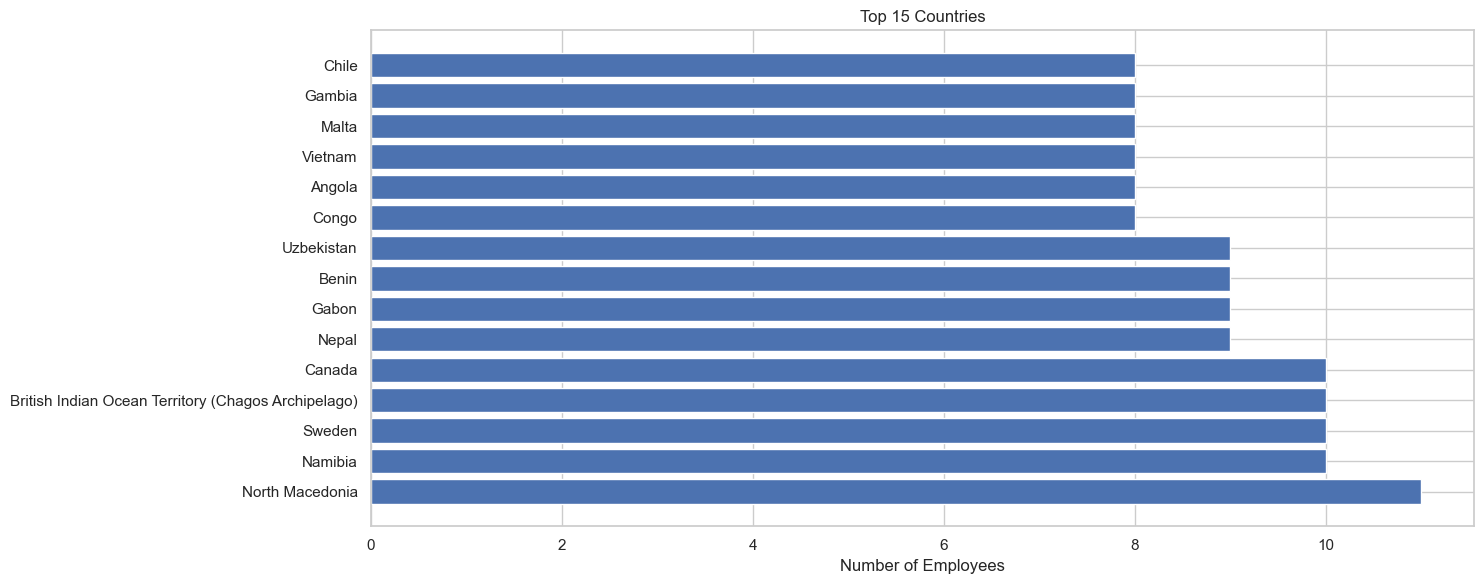


Top 10 Cities:
city
Lake Adam          4
East John          3
North Robert       3
North Stephanie    3
North Jennifer     3
Lake Brian         3
East Jennifer      2
Jessicaview        2
Lake James         2
Lake Jennifer      2
Name: count, dtype: int64


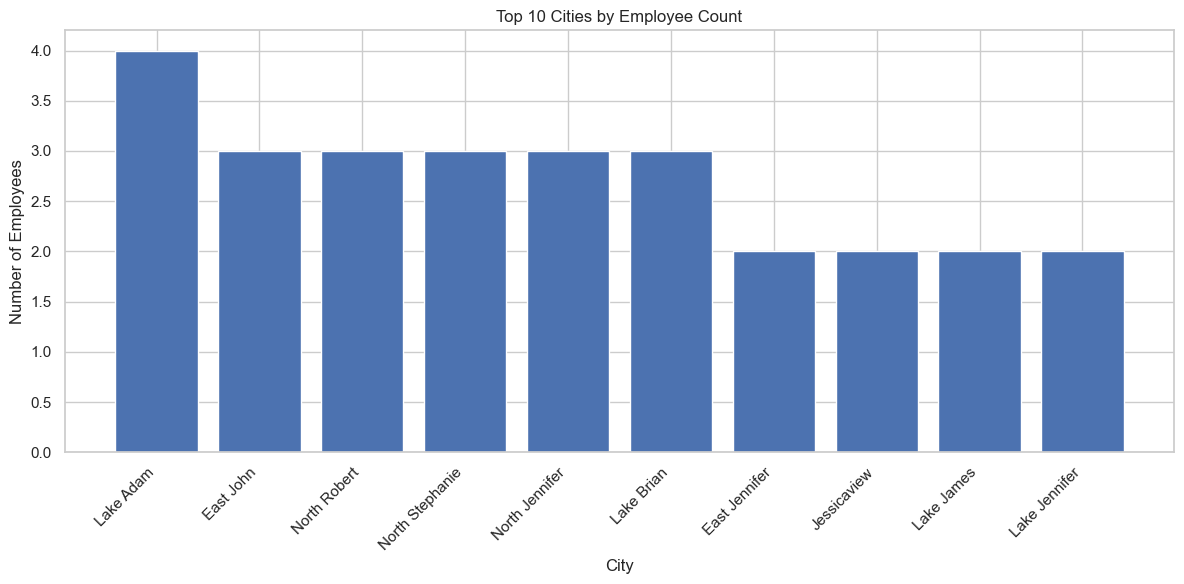

In [5]:
def analyze_addresses(df):
    """Comprehensive analysis of address data."""
    print("\n=== Geographic Analysis ===")
    
    # Country distribution
    country_counts = df['country'].value_counts()
    
    # Top 15 countries bar plot
    plt.figure(figsize=(15, 6))
    plt.barh(country_counts.head(15).index, country_counts.head(15).values)
    plt.title('Top 15 Countries')
    plt.xlabel('Number of Employees')
    plt.tight_layout()
    plt.show()
    
    # City analysis
    city_counts = df['city'].value_counts()
    print("\nTop 10 Cities:")
    print(city_counts.head(10))
    
    # City distribution plot
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(city_counts.head(10))), city_counts.head(10).values)
    plt.title('Top 10 Cities by Employee Count')
    plt.xticks(range(len(city_counts.head(10))), city_counts.head(10).index,
               rotation=45, ha='right')
    plt.xlabel('City')
    plt.ylabel('Number of Employees')
    plt.tight_layout()
    plt.show()
    
    # Interactive choropleth
    country_df = pd.DataFrame({
        'country': country_counts.index,
        'count': country_counts.values
    })
    
    fig = px.choropleth(
        country_df,
        locations='country',
        locationmode='country names',
        color='count',
        title='Global Distribution of Employees',
        color_continuous_scale='Viridis'
    )
    fig.show()

analyze_addresses(addresses_df)

## 4. Cross-Table Analysis

Analyzing relationships between different tables.


=== Cross-Table Analysis ===


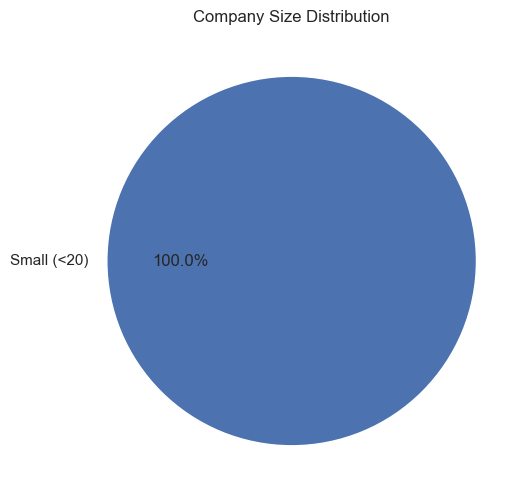

In [6]:
def cross_table_analysis(people_df, assignments_df, addresses_df):
    """Analyze relationships between different tables."""
    print("\n=== Cross-Table Analysis ===")
    
    # Merge data for analysis
    # merged_df = pd.merge(people_df, addresses_df,
    #                     left_on='per_id', right_on='addresses_id')
    
    # Age distribution by top countries
    # top_countries = merged_df['country'].value_counts().head(10).index
    # country_data = merged_df[merged_df['country'].isin(top_countries)]
    
    # plt.figure(figsize=(15, 6))
    # plt.boxplot([group['age'].values for name, group in 
    #              country_data.groupby('country')],
    #             labels=top_countries)
    # plt.title('Age Distribution by Country (Top 10 Countries)')
    # plt.xticks(rotation=45)
    # plt.ylabel('Age')
    # plt.tight_layout()
    # plt.show()
    
    # Job distribution by company size
    company_size = assignments_df['company'].value_counts()
    assignments_df['company_size'] = assignments_df['company'].map(
        lambda x: 'Large (50+)' if company_size[x] > 50
        else 'Medium (20-50)' if company_size[x] > 20
        else 'Small (<20)'
    )
    
    plt.figure(figsize=(10, 6))
    company_size_counts = assignments_df['company_size'].value_counts()
    plt.pie(company_size_counts.values, labels=company_size_counts.index,
            autopct='%1.1f%%')
    plt.title('Company Size Distribution')
    plt.show()
    
    # Average age by job type
    # job_age = merged_df.groupby('job')['age'].mean().sort_values(ascending=False)
    
    # plt.figure(figsize=(12, 6))
    # plt.bar(range(len(job_age.head(10))), job_age.head(10).values)
    # plt.title('Average Age by Job Type (Top 10)')
    # plt.xticks(range(len(job_age.head(10))), job_age.head(10).index,
    #            rotation=45, ha='right')
    # plt.ylabel('Average Age')
    # plt.tight_layout()
    # plt.show()

cross_table_analysis(people_df, assignments_df, addresses_df)

# HR Data Analysis

This notebook provides a comprehensive analysis of the HR database, including:
- Statistical analysis
- Data distributions
- Trends and patterns
- Relationships between different data points

## Table of Contents:
1. Data Loading and Setup
2. People Analysis
3. Assignments Analysis
4. Geographic Analysis (Addresses)
5. Cross-Table Analysis

# HR Data Analysis

This notebook provides a comprehensive analysis of the HR database, including:
- Statistical analysis
- Data distributions
- Trends and patterns
- Relationships between different data points

## Table of Contents:
1. Data Loading and Setup
2. People Analysis
3. Assignments Analysis
4. Geographic Analysis (Addresses)
5. Cross-Table Analysis

# HR Data Analysis

This notebook provides a comprehensive analysis of the HR database, including:
- Statistical analysis
- Data distributions
- Trends and patterns
- Relationships between different data points

## Table of Contents:
1. Data Loading and Setup
2. People Analysis
3. Assignments Analysis
4. Geographic Analysis (Addresses)
5. Cross-Table Analysis

# HR Data Analysis

This notebook provides a comprehensive analysis of the HR database, including:
- Statistical analysis
- Data distributions
- Trends and patterns
- Relationships between different data points

## Table of Contents:
1. Data Loading and Setup
2. People Analysis
3. Assignments Analysis
4. Geographic Analysis (Addresses)
5. Cross-Table Analysis

## Summary Statistics

Let's generate a summary of key findings from our analysis.

In [7]:
def generate_summary(people_df, assignments_df, addresses_df):
    """Generate summary statistics and key findings."""
    print("=== Summary Statistics ===")
    
    print("\nWorkforce Overview:")
    print(f"Total Employees: {len(people_df)}")
    print(f"Average Age: {people_df['age'].mean():.1f} years")
    print(f"Number of Unique Jobs: {people_df['job'].nunique()}")
    print(f"Number of Companies: {assignments_df['company'].nunique()}")
    print(f"Number of Countries: {addresses_df['country'].nunique()}")
    
    print("\nAge Distribution:")
    print(people_df['age'].describe())
    
    print("\nTop 5 Jobs:")
    print(people_df['job'].value_counts().head())
    
    print("\nTop 5 Countries:")
    print(addresses_df['country'].value_counts().head())
    
    # Calculate additional metrics
    print("\nAdditional Metrics:")
    print(f"Median Company Size: {assignments_df['company'].value_counts().median():.1f} employees")
    print(f"Most Common Age Group: {(people_df['age'] // 10 * 10).value_counts().index[0]}s")
    
generate_summary(people_df, assignments_df, addresses_df)

=== Summary Statistics ===

Workforce Overview:
Total Employees: 1000
Average Age: 54.9 years
Number of Unique Jobs: 518
Number of Companies: 974
Number of Countries: 240

Age Distribution:
count    1000.000000
mean       54.896000
std        33.477783
min         0.000000
25%        26.000000
50%        53.000000
75%        83.000000
max       115.000000
Name: age, dtype: float64

Top 5 Jobs:
job
Lecturer, higher education            7
Public relations account executive    6
Research officer, political party     6
Surveyor, rural practice              5
Librarian, academic                   5
Name: count, dtype: int64

Top 5 Countries:
country
North Macedonia                                        11
Namibia                                                10
Sweden                                                 10
British Indian Ocean Territory (Chagos Archipelago)    10
Canada                                                 10
Name: count, dtype: int64

Additional Metrics:
Median Com

In [8]:
assignments_df['company'].value_counts()

company
Young and Sons                    3
Martinez Inc                      2
Davis Ltd                         2
Dawson Group                      2
Barnes Inc                        2
                                 ..
Townsend, Gilmore and Robinson    1
Barrett, Hale and Burke           1
Perez Inc                         1
Wong, Clark and Thompson          1
Herman, Henry and Taylor          1
Name: count, Length: 974, dtype: int64